# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5 2024, 11:41 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Veyonce C. Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

Discussion:

For Module A2 we analyze galaxy data, seperate the column of its class, and attempt to predict it through sklearn's DecisionTreeClassifier. The dataset is first divided into features, and targets. The features are used to predict the class of the data and compare it to its actual class in targets. The comparison between the predicted and actual class is put through a confusion matrix to visualize the accuracy of the predictions. The values and distribution of the confusion matrix are altered when displaying bare predictions an i number of times. Different values of i output different results of the matrix.

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```galaxy_catalogue.npy``` from your Google Drive folder.

Mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP157/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [ ]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [ ]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [ ]:
def get_features_targets(data):

    #features
    colors = np.array([data['u-g'], data['g-r'], data['r-i'], data['i-z']]).T
    magnitudes = np.array([data['m4_u'], data['m4_g'], data['m4_r'], data['m4_i'], data['m4_z']]).T
    concentrations = np.array([data['petroR50_u'] / data['petroR90_u'], data['petroR50_r'] / data['petroR90_r'], data['petroR50_z'] / data['petroR90_z']]).T
    eccentricity = np.array(data['ecc']).reshape(-1, 1)

    features = np.concatenate((colors, eccentricity, magnitudes, concentrations), axis=1)

    #targets
    targets = np.array(data['class'])

    return features, targets

In [ ]:
features, targets = get_features_targets(data)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

#accurate to the sample function

Features shape: (780, 13)
Targets shape: (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def predict_class(data):
    features, targets = get_features_targets(data)

    #splitting the dataset into training and test sets, 80/20 ratio
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

    #initializing the decision tree classifier
    #clf is classifier
    clf = DecisionTreeClassifier()

    #training classifier
    clf.fit(X_train, y_train)

    #predicting classes for the test set
    predicted_class = clf.predict(X_test)

    return predicted_class, y_test

In [53]:
data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(100):
   print("{},{},{}".format(i, predicted_class[i], actual_class[i]))

#example code was outputting TypeError: unsupported operand type(s) for &: 'str' and 'tuple'
#using format() to fix problem

#the confusion matrix changes depending on i

0,spiral,spiral
1,spiral,spiral
2,merger,spiral
3,spiral,spiral
4,elliptical,elliptical
5,merger,merger
6,merger,elliptical
7,spiral,spiral
8,spiral,merger
9,spiral,spiral
10,elliptical,elliptical
11,elliptical,spiral
12,merger,spiral
13,spiral,spiral
14,spiral,spiral
15,merger,merger
16,elliptical,elliptical
17,merger,merger
18,elliptical,elliptical
19,merger,merger
20,merger,merger
21,merger,merger
22,merger,merger
23,elliptical,elliptical
24,merger,merger
25,merger,spiral
26,spiral,spiral
27,elliptical,elliptical
28,elliptical,elliptical
29,spiral,merger
30,elliptical,elliptical
31,spiral,merger
32,merger,merger
33,merger,spiral
34,spiral,spiral
35,elliptical,elliptical
36,spiral,spiral
37,merger,elliptical
38,elliptical,elliptical
39,merger,spiral
40,elliptical,elliptical
41,spiral,spiral
42,merger,merger
43,spiral,spiral
44,merger,merger
45,spiral,spiral
46,elliptical,elliptical
47,elliptical,elliptical
48,elliptical,merger
49,merger,spiral
50,elliptical,elliptical
51,spiral,spira

#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score


#confusion matrix
cm = confusion_matrix(actual_class, predicted_class)
print("Confusion Matrix:")
print(cm)

#test accuracy
test_accuracy = accuracy_score(actual_class, predicted_class)
print("Test Accuracy:", test_accuracy)

Confusion Matrix:
[[50  5  0]
 [ 3 39  7]
 [ 1 15 36]]
Test Accuracy: 0.8012820512820513


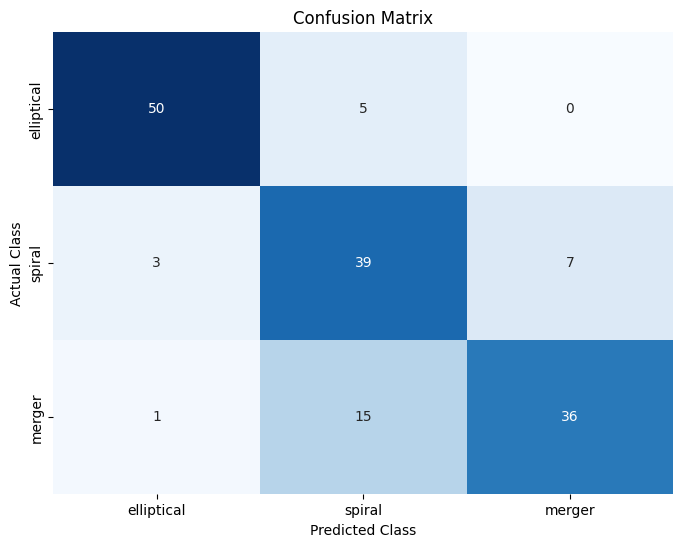

In [55]:
##GRAPHING CONFUSION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#class names
class_names = ['elliptical', 'spiral', 'merger']  # Replace with your actual class names

predicted_class, actual_class = predict_class(data)

#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

#adding labels to each tick
plt.xticks(ticks=[i + 0.5 for i in range(len(class_names))], labels=class_names)
plt.yticks(ticks=[i + 0.5 for i in range(len(class_names))], labels=class_names)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

#The initial matrix's x and y units were just 0,1,2 not elliptical, spiral, and merger
#accuracy on cdll above
#check what happens when u alter i in the loop